In [61]:
from pycaret.utils import version
version()

'3.3.2'

### reading and cleaning data

In [62]:
import pandas as pd

In [63]:
df_ind = pd.read_csv('../data_ind.csv')
df_oecd = pd.read_csv('../data_oecd.csv')

In [64]:
df_oecd = df_oecd.sort_values(by=['Country', 'Time_Period'])
df_oecd['Time_Period'] = pd.to_datetime(df_oecd['Time_Period'], format='%Y-%m')

df_deu = df_oecd[(df_oecd['Country'] == 'DEU')]
df_usa = df_oecd[(df_oecd['Country'] == 'USA')]

df_ind['Time_Period'] = df_ind['Year'].astype(str) + '-' + df_ind['Quarter'].map({'-': '01', 'Q1': '02', 'Q3': '08'})
df_ind['Country'] = 'IND'  # Add country column
df_ind = df_ind[['Country', 'Time_Period', 'Unemployment_Rate']]
df_ind['Time_Period'] = pd.to_datetime(df_ind['Time_Period'], format='%Y-%m')

In [65]:
select_df_ind = df_ind[df_ind['Time_Period'].dt.year >= 2005]
select_df_deu = df_deu[df_deu['Time_Period'].dt.year >= 2005]
select_df_usa = df_usa[df_usa['Time_Period'].dt.year >= 2005]


### time series decomposition

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [67]:
select_df_ind = select_df_ind.drop(['Country'], axis=1)
select_df_ind['Time_Period'] = pd.to_datetime(select_df_ind['Time_Period'])
select_df_ind.set_index('Time_Period', inplace=True)
select_df_ind.index = pd.PeriodIndex(select_df_ind.index, freq='Q')

In [71]:
select_df_ind_ = select_df_ind.copy()  # Avoid modifying the original data
select_df_ind_.index = select_df_ind_.index.to_timestamp()  # Convert to datetime

In [74]:
select_df_deu = select_df_deu.drop(['Country'], axis=1)
select_df_deu['Time_Period'] = pd.to_datetime(select_df_deu['Time_Period'])
select_df_deu.set_index('Time_Period', inplace=True)
select_df_deu.index = pd.PeriodIndex(select_df_deu.index, freq='M')

In [75]:
select_df_deu_ = select_df_deu.copy()  # Avoid modifying the original data
select_df_deu_.index = select_df_deu_.index.to_timestamp()  # Convert to datetime

In [76]:
select_df_usa = select_df_usa.drop(['Country'], axis=1)
select_df_usa['Time_Period'] = pd.to_datetime(select_df_usa['Time_Period'])
select_df_usa.set_index('Time_Period', inplace=True)
select_df_usa.index = pd.PeriodIndex(select_df_usa.index, freq='M')

In [77]:
select_df_usa_ = select_df_usa.copy()  # Avoid modifying the original data
select_df_usa_.index = select_df_usa_.index.to_timestamp()  # Convert to datetime

In [78]:
# additive decomp 
add_decomp_ind = seasonal_decompose(select_df_ind_['Unemployment_Rate'], model='additive', period=2)
add_decomp_deu = seasonal_decompose(select_df_deu_['Unemployment_Rate'], model='additive', period=12)
add_decomp_usa = seasonal_decompose(select_df_usa_['Unemployment_Rate'], model='additive', period=12)

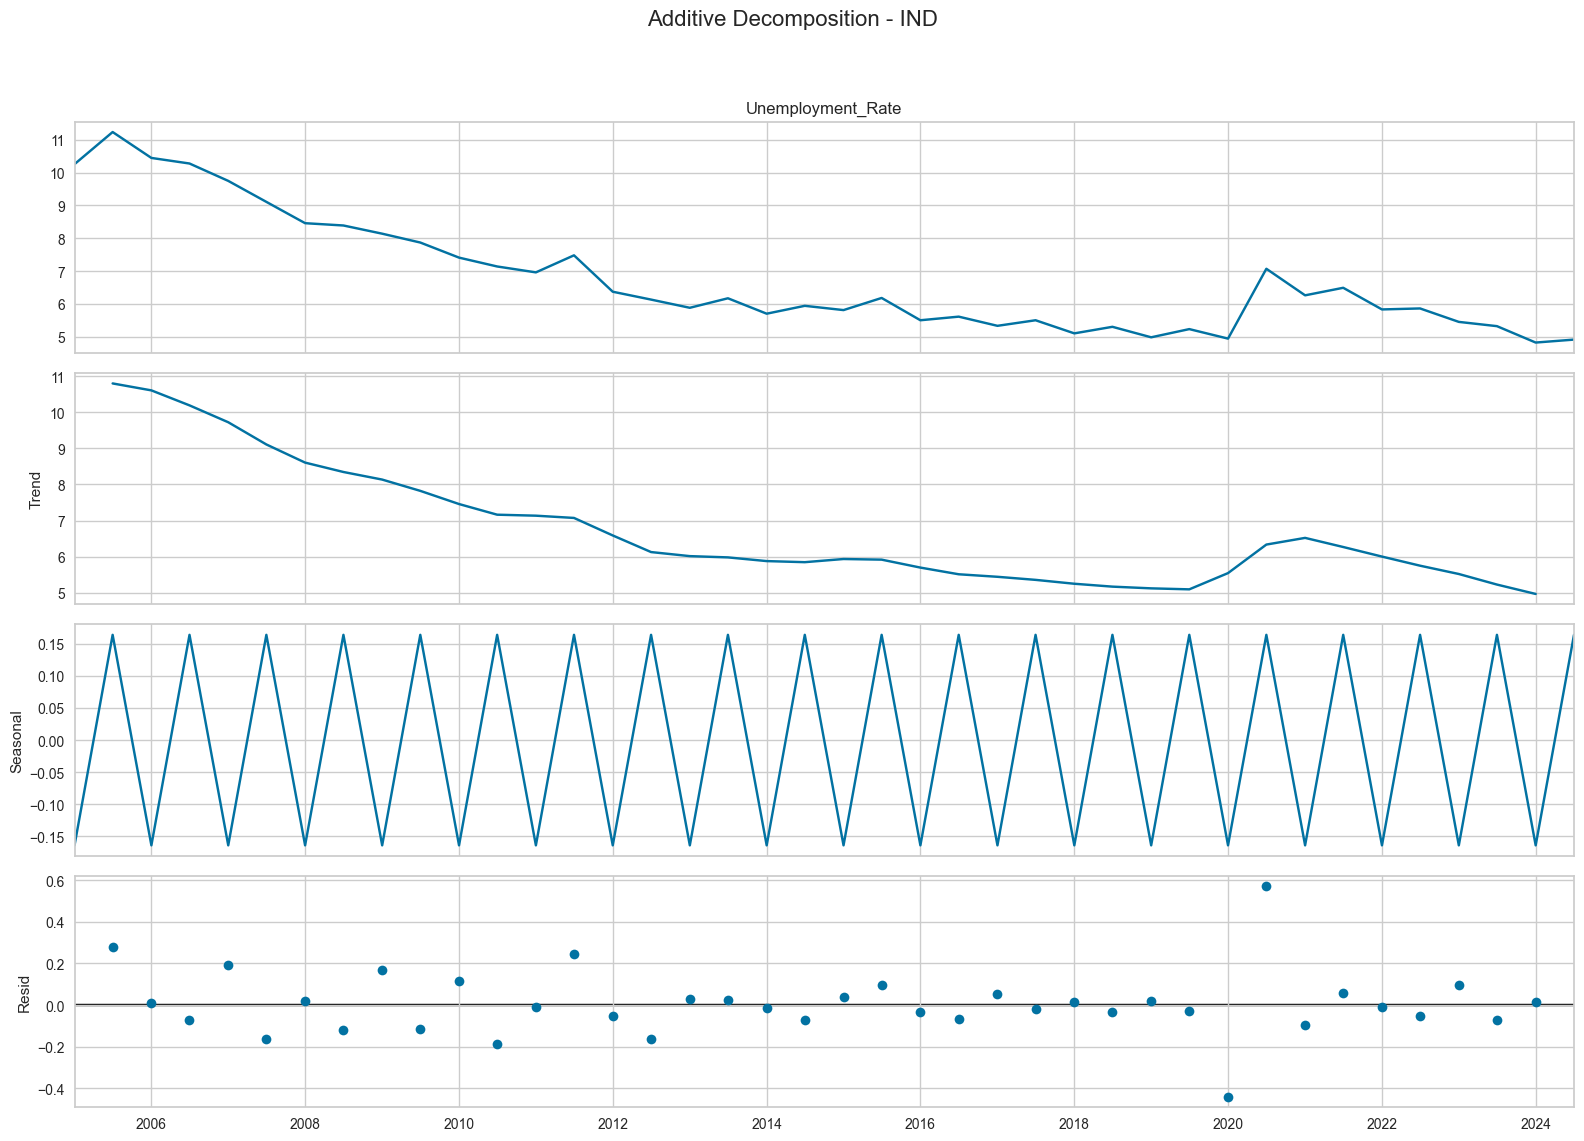

In [73]:
# Set figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

fig = add_decomp_ind.plot()
fig.suptitle('Additive Decomposition - IND', fontsize=16)

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

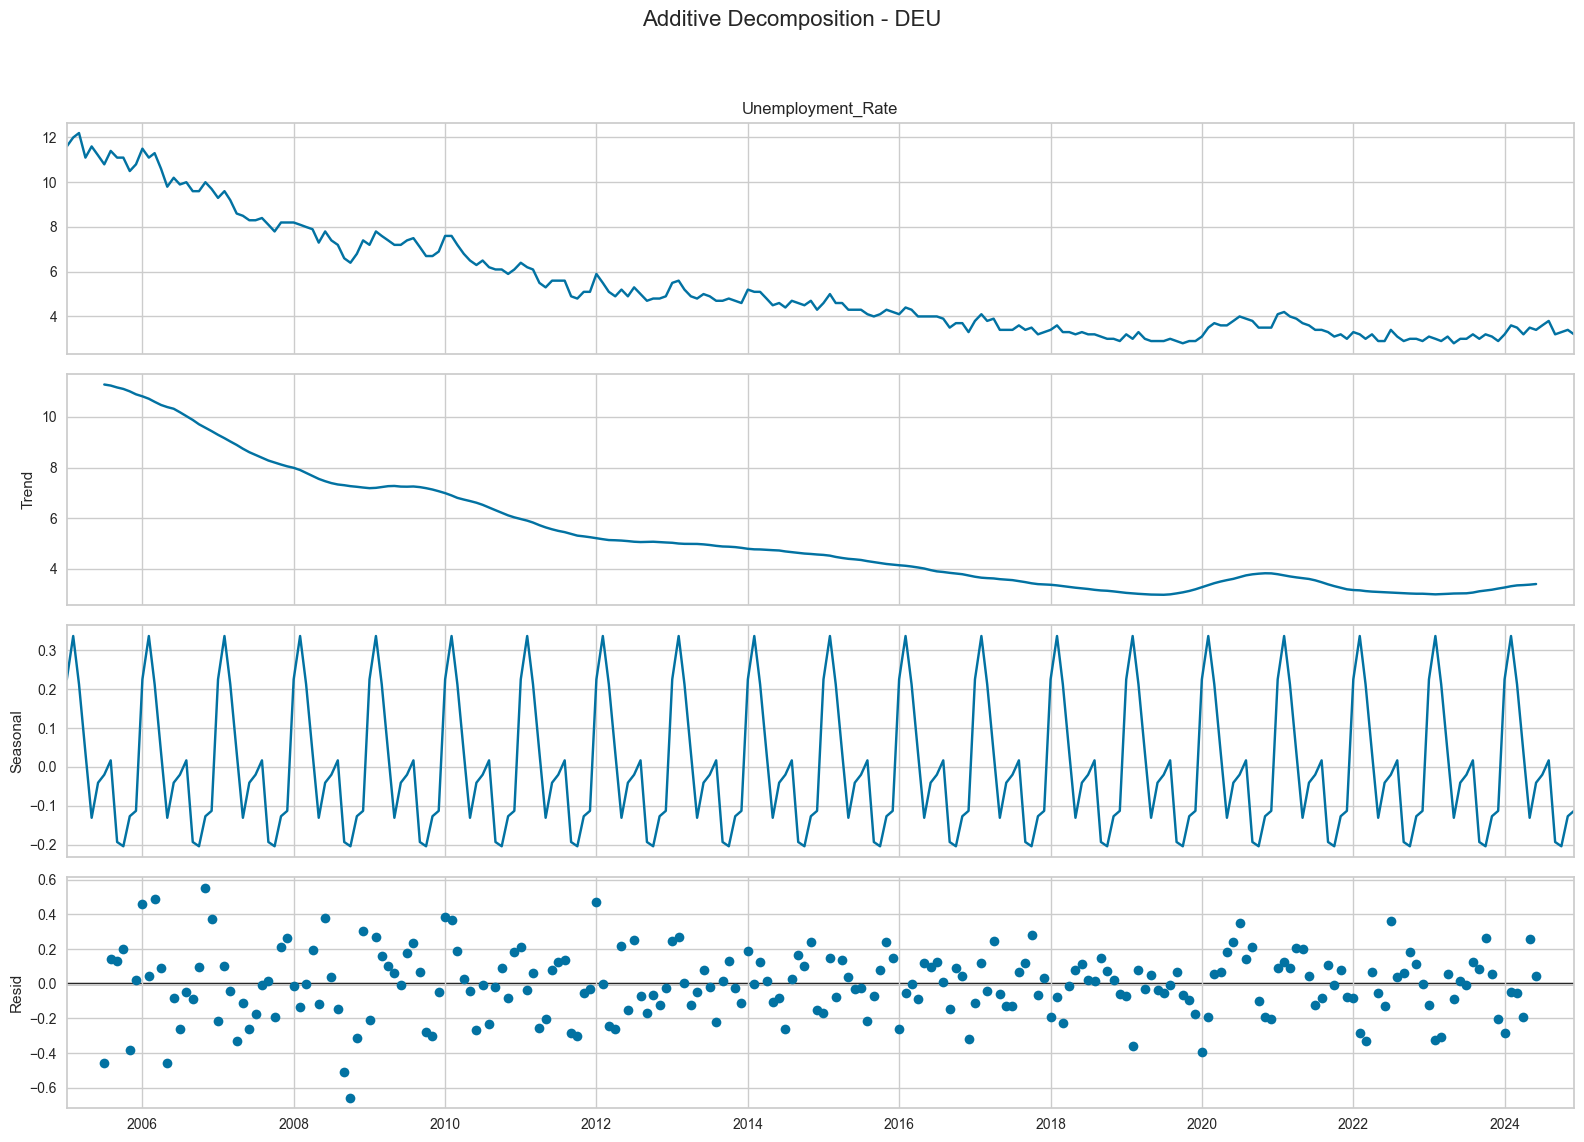

In [79]:
# Set figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

fig = add_decomp_deu.plot()
fig.suptitle('Additive Decomposition - DEU', fontsize=16)

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

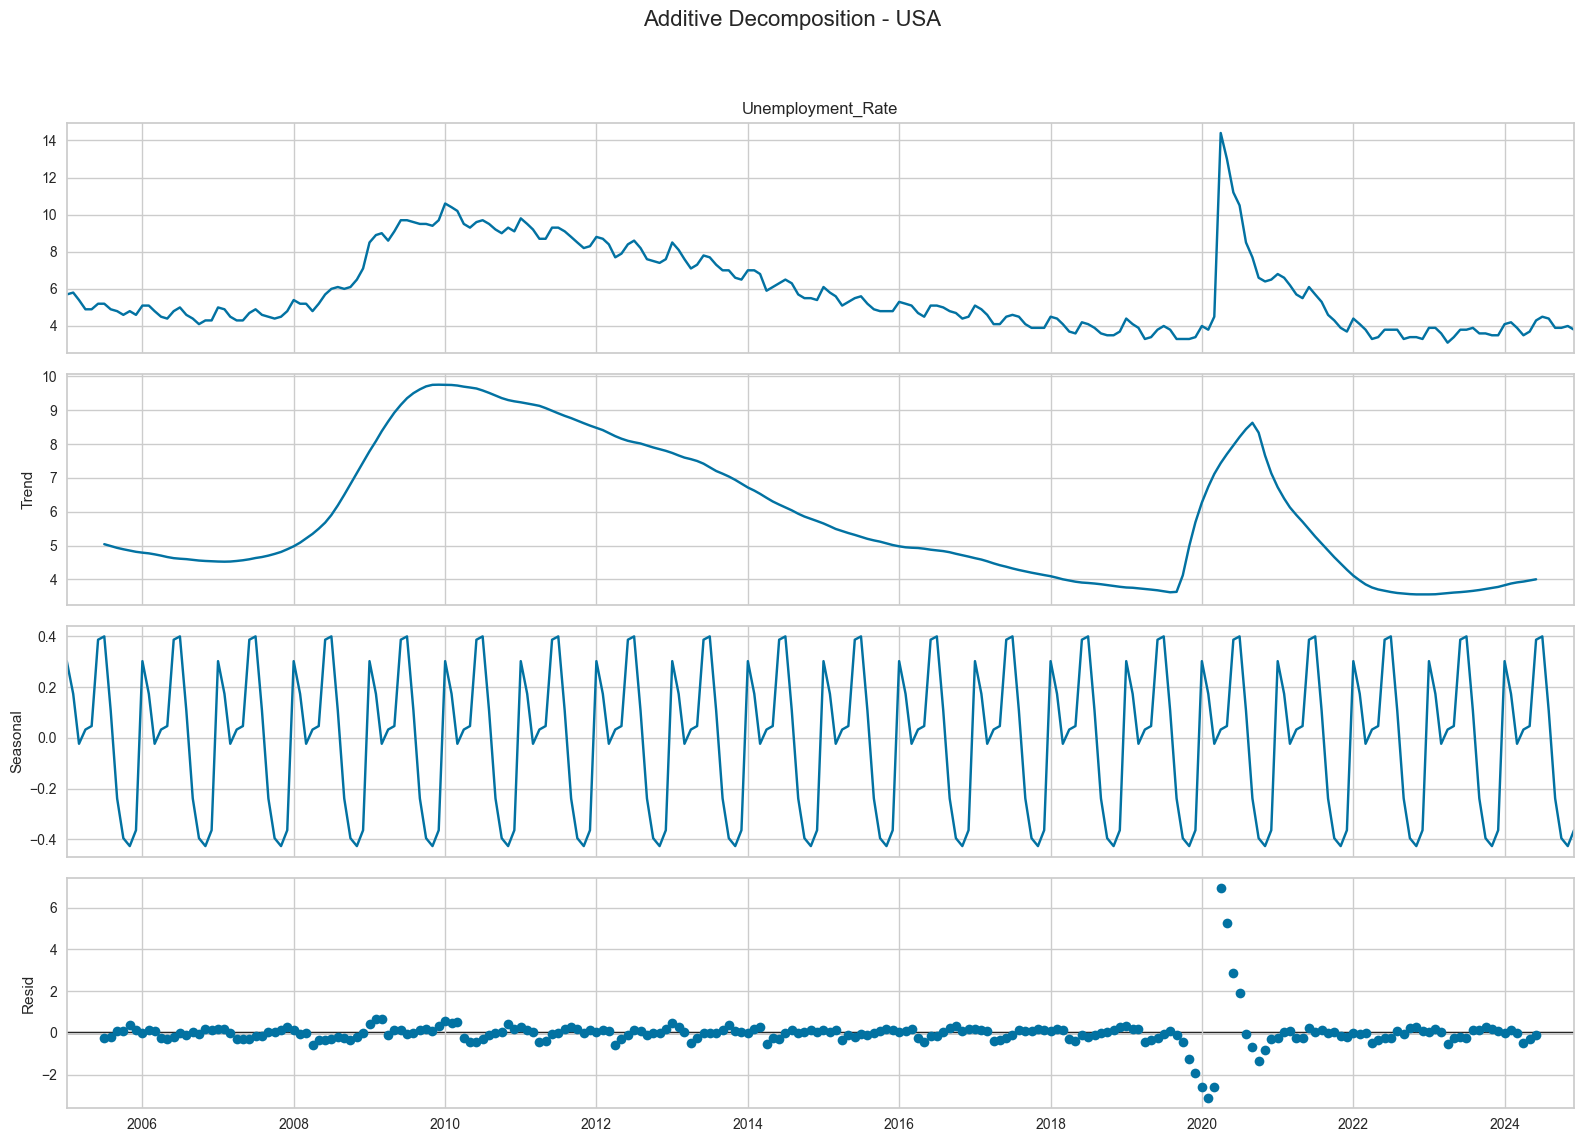

In [80]:
# Set figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

fig = add_decomp_usa.plot()
fig.suptitle('Additive Decomposition - USA', fontsize=16)

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### seasonal subplots

In [89]:
import seaborn as sns

In [94]:
select_df_ind_['Period'] = select_df_ind_.index.quarter
select_df_deu_['Period'] = select_df_deu_.index.month
select_df_usa_['Period'] = select_df_usa_.index.month

select_df_ind_['Year'] = select_df_ind_.index.year
select_df_deu_['Year'] = select_df_deu_.index.year
select_df_usa_['Year'] = select_df_usa_.index.year

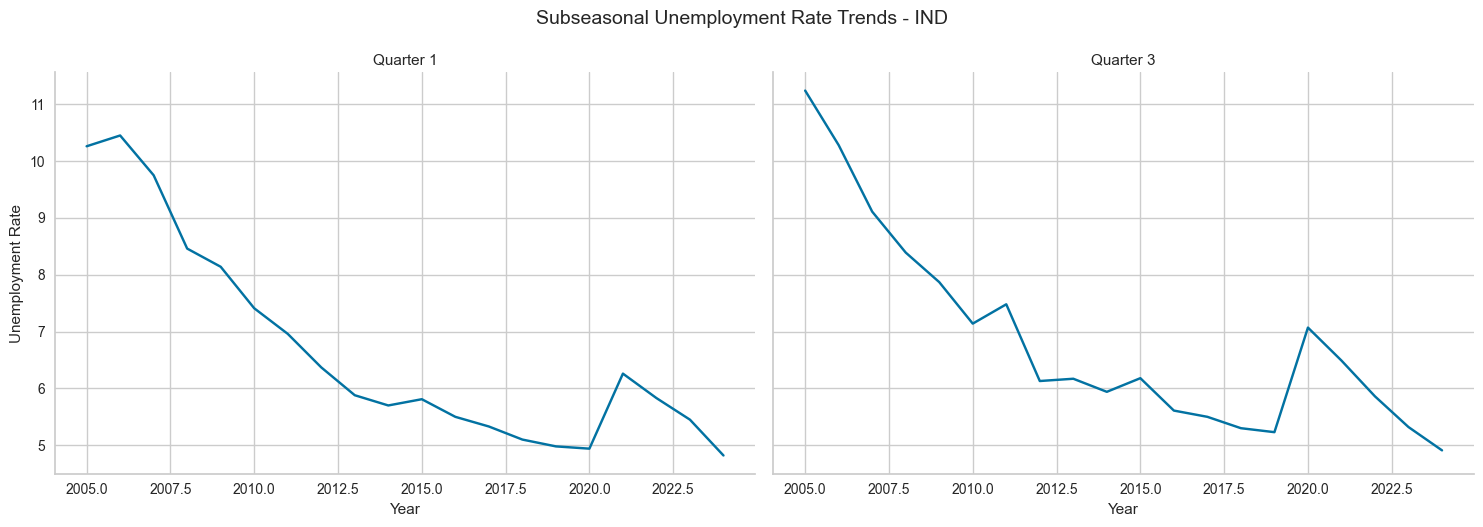

In [96]:
g = sns.FacetGrid(select_df_ind_, col="Period", col_wrap=2, height=5, aspect=1.5, sharey=True)
g.map(sns.lineplot, "Year", "Unemployment_Rate")

g.set_axis_labels("Year", "Unemployment Rate")
g.set_titles("Quarter {col_name}")  # Titles will be "Quarter 1" and "Quarter 3"

plt.suptitle("Subseasonal Unemployment Rate Trends - IND", fontsize=14, y=1.05)
plt.show()

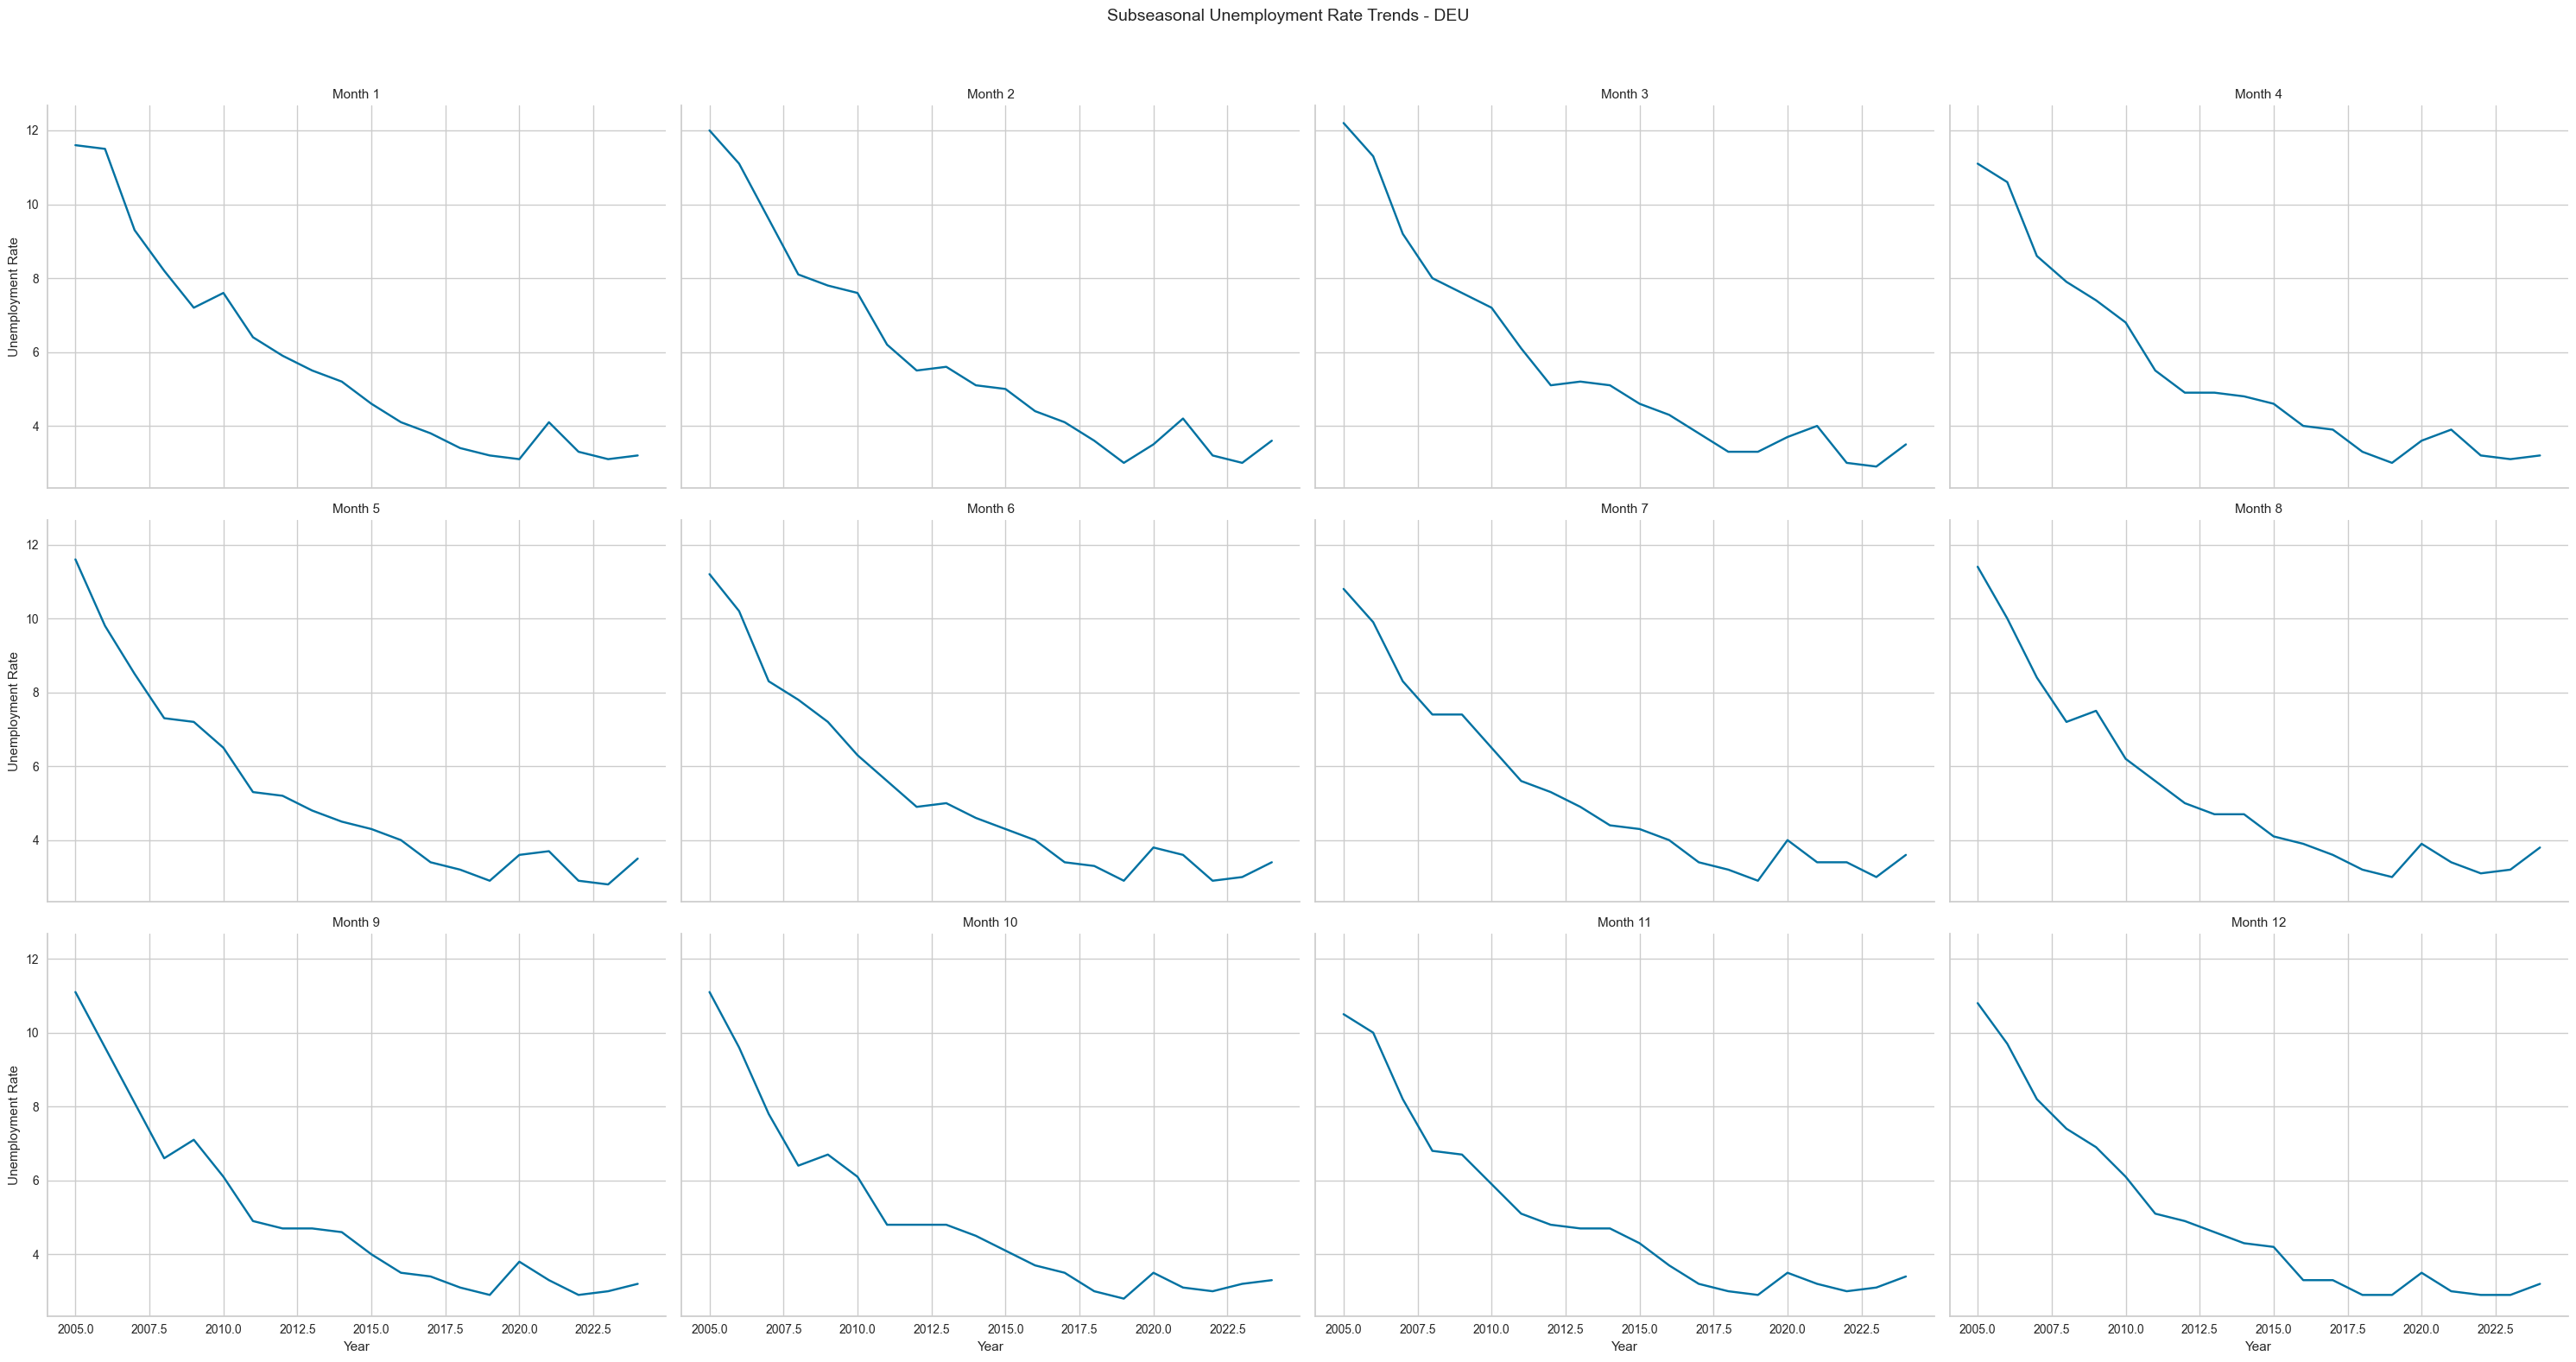

In [ ]:
g = sns.FacetGrid(select_df_deu_, col="Period", col_wrap=4, height=5, aspect=1.5, sharey=True)
g.map(sns.lineplot, "Year", "Unemployment_Rate")

g.set_axis_labels("Year", "Unemployment Rate")
g.set_titles("Month {col_name}") 

plt.suptitle("Subseasonal Unemployment Rate Trends - DEU", fontsize=14, y=1.05)
plt.show()

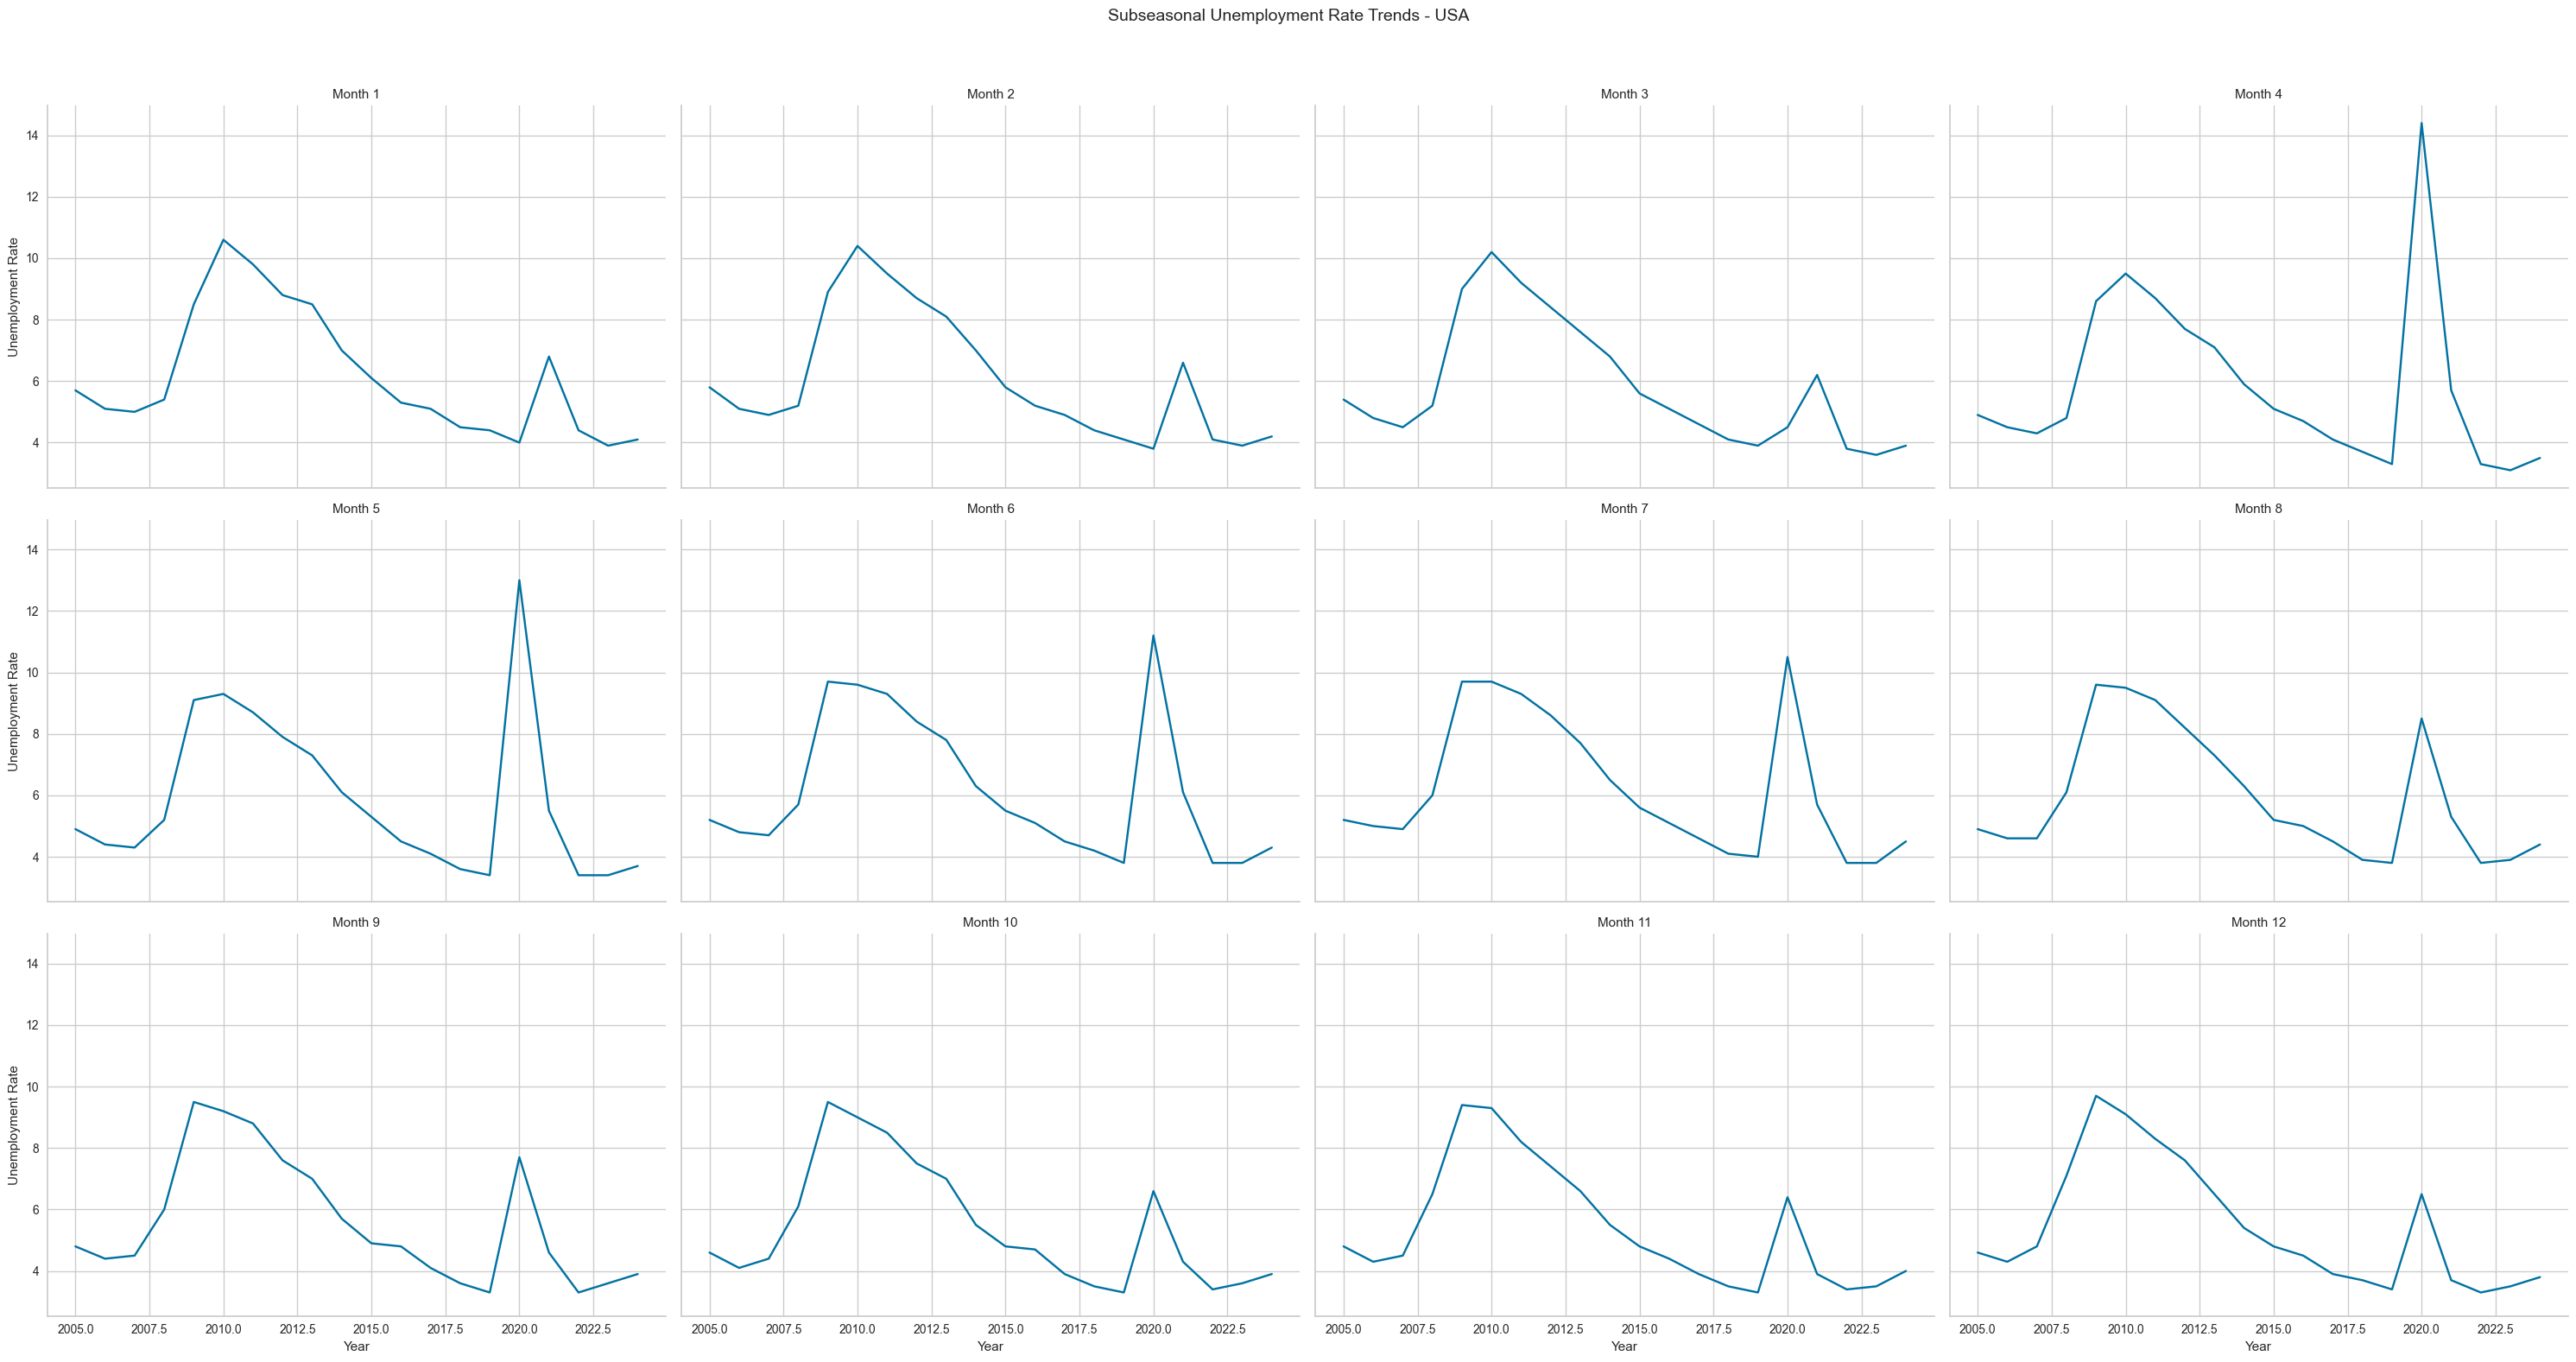

In [104]:
g = sns.FacetGrid(select_df_usa_, col="Period", col_wrap=4, height=5, aspect=1.5, sharey=True)
g.map(sns.lineplot, "Year", "Unemployment_Rate")

g.set_axis_labels("Year", "Unemployment Rate")
g.set_titles("Month {col_name}")  

plt.suptitle("Subseasonal Unemployment Rate Trends - USA", fontsize=14, y=1.05)
plt.show()

### ACF and PACF

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 600x300 with 0 Axes>

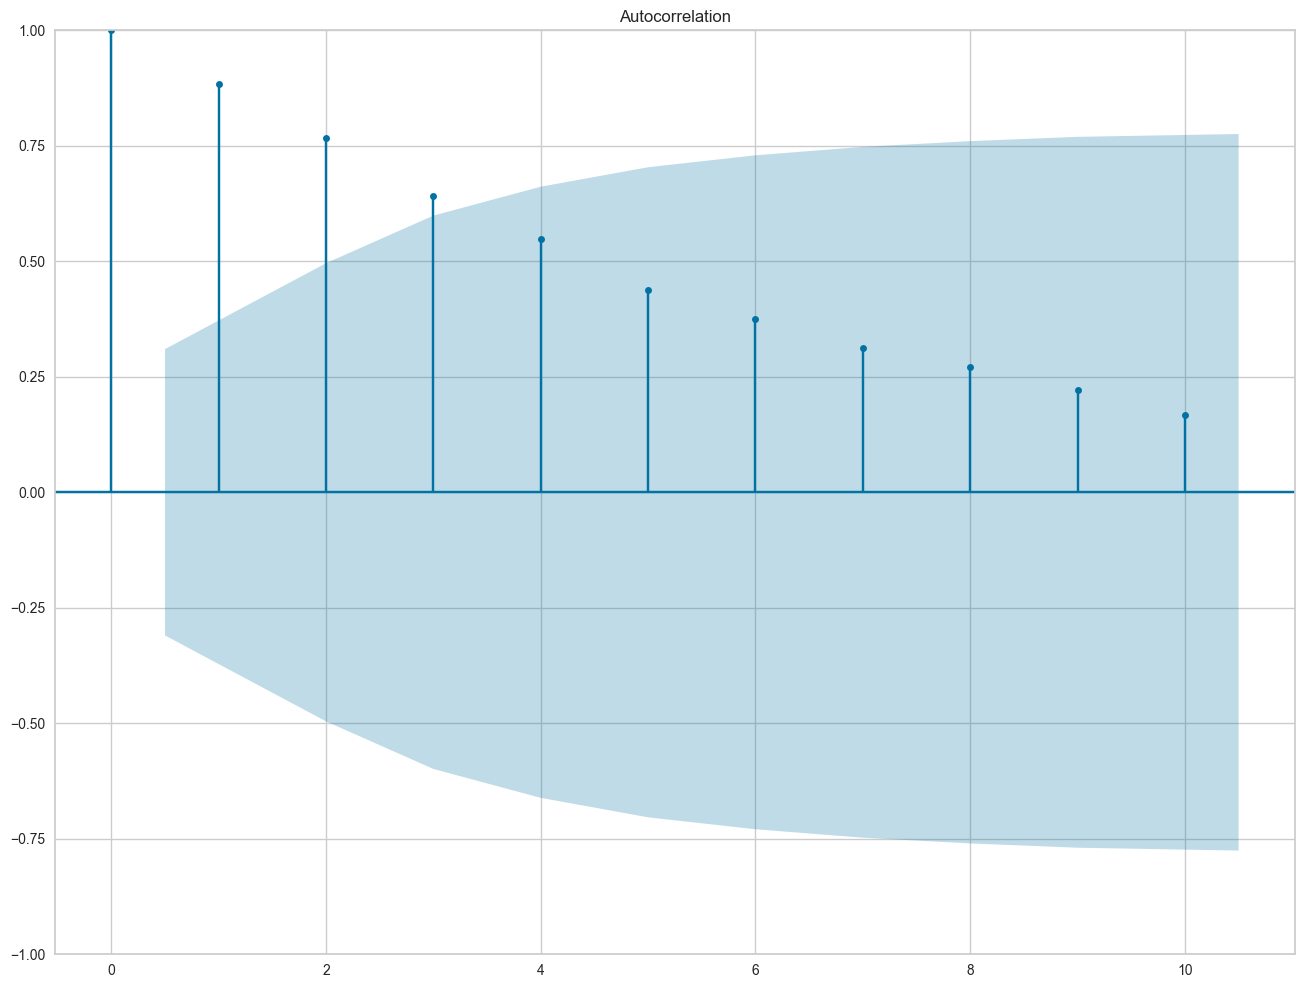

<Figure size 600x300 with 0 Axes>

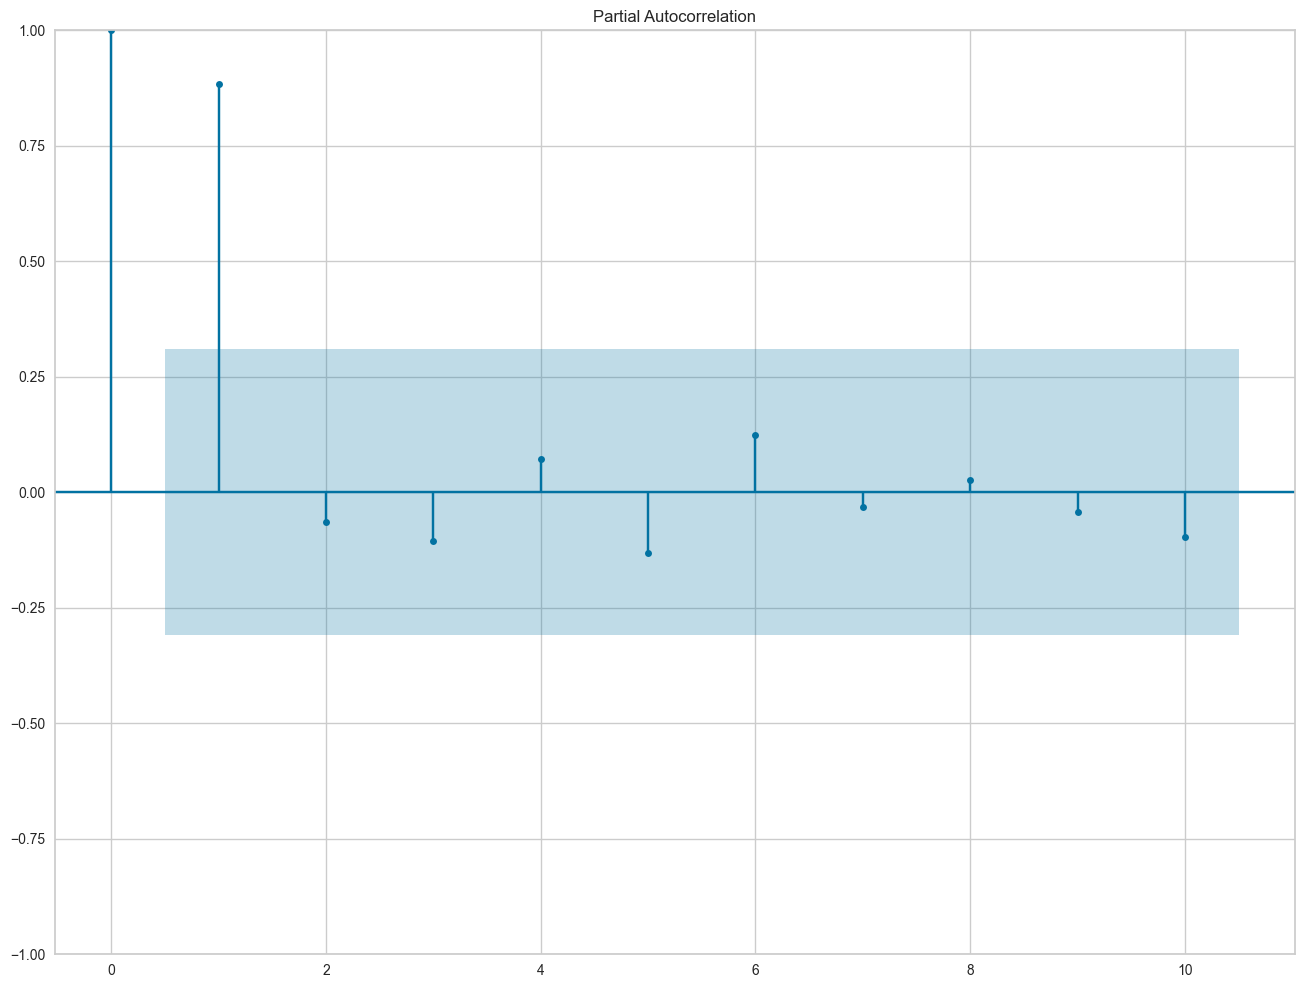

In [107]:
plt.figure(figsize=(6,3))
plot_acf(select_df_ind_['Unemployment_Rate'], lags=10)  # Adjust lags based on your data
plt.show()

plt.figure(figsize=(6,3))
plot_pacf(select_df_ind_['Unemployment_Rate'], lags=10)
plt.show()

<Figure size 600x300 with 0 Axes>

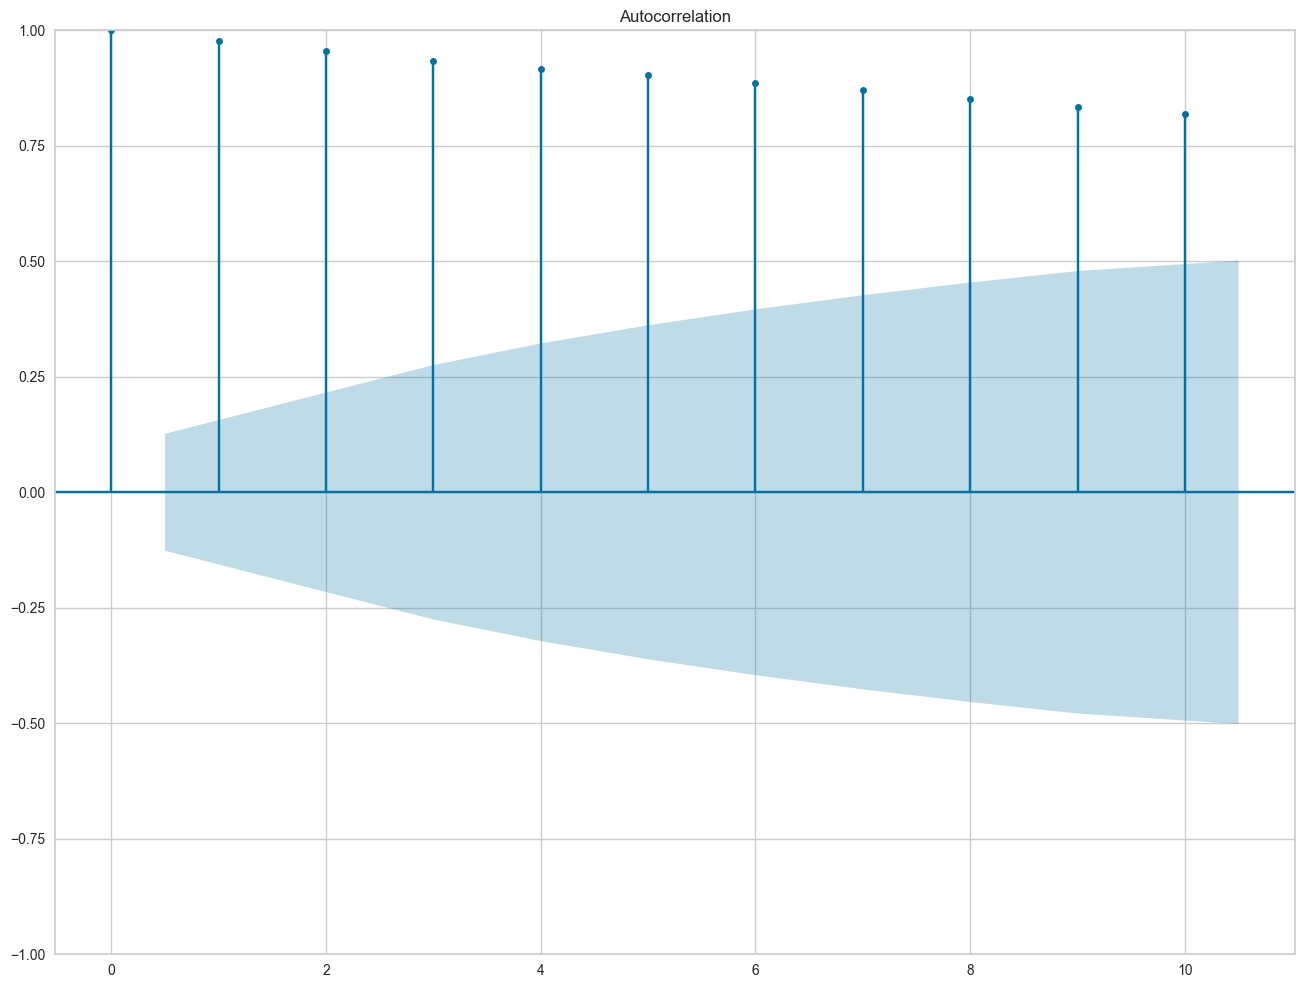

<Figure size 600x300 with 0 Axes>

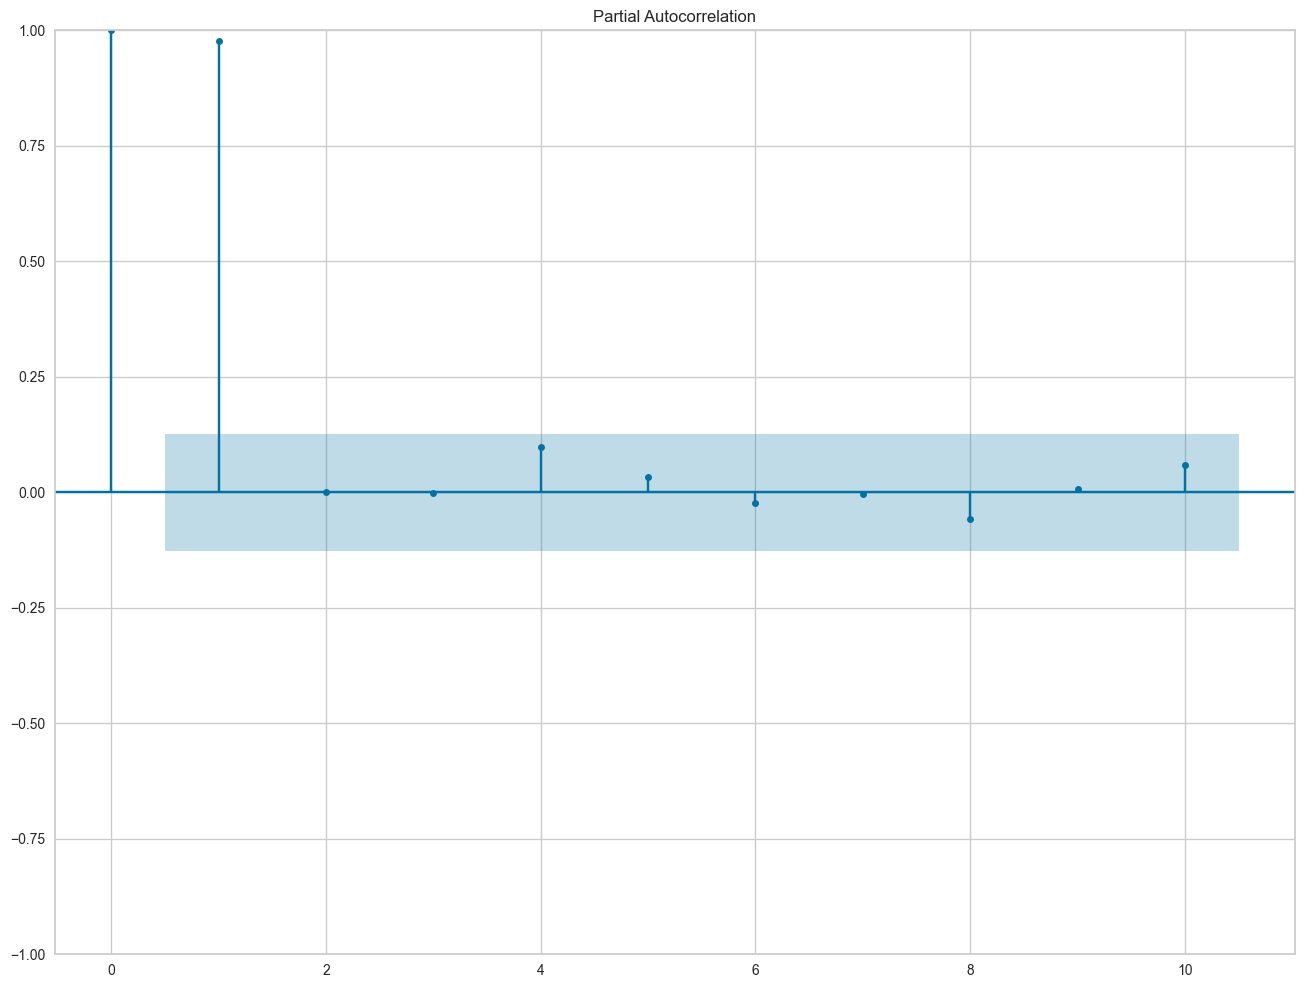

In [108]:
plt.figure(figsize=(6,3))
plot_acf(select_df_deu_['Unemployment_Rate'], lags=10)  # Adjust lags based on your data
plt.show()

plt.figure(figsize=(6,3))
plot_pacf(select_df_deu_['Unemployment_Rate'], lags=10)
plt.show()

<Figure size 600x300 with 0 Axes>

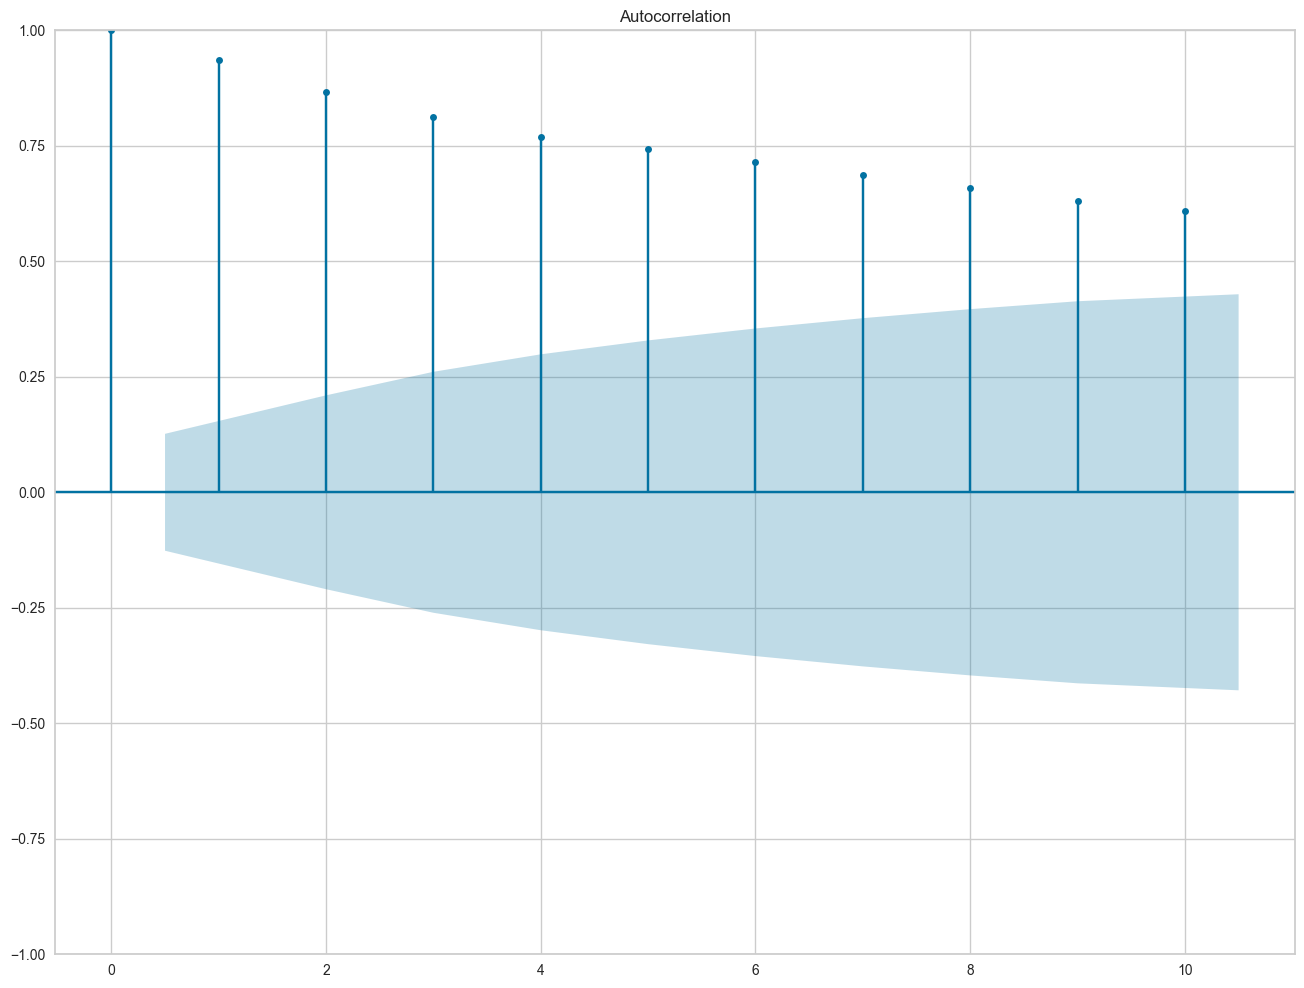

<Figure size 600x300 with 0 Axes>

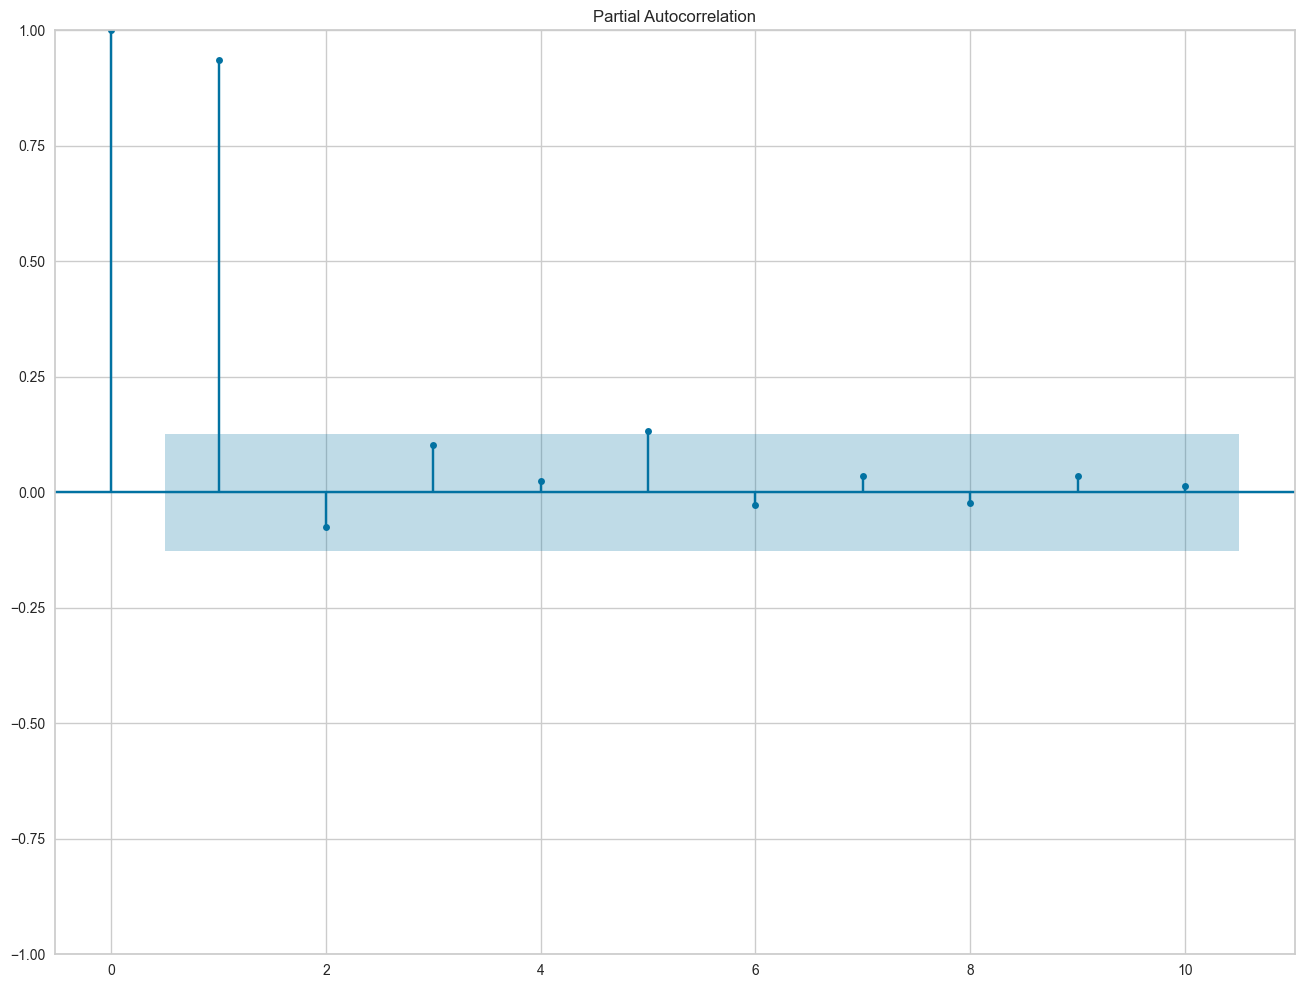

In [109]:
plt.figure(figsize=(6,3))
plot_acf(select_df_usa_['Unemployment_Rate'], lags=10)  # Adjust lags based on your data
plt.show()

plt.figure(figsize=(6,3))
plot_pacf(select_df_usa_['Unemployment_Rate'], lags=10)
plt.show()

### Stationarity test

In [110]:
from statsmodels.tsa.stattools import adfuller, kpss

In [111]:
adf_test_ind = adfuller(select_df_ind_['Unemployment_Rate'])
print(f"ADF Statistic: {adf_test_ind[0]}")
print(f"p-value: {adf_test_ind[1]}")

kpss_test_ind = kpss(select_df_ind_['Unemployment_Rate'], regression='c')
print(f"KPSS Statistic: {kpss_test_ind[0]}")
print(f"p-value: {kpss_test_ind[1]}")

ADF Statistic: -2.981114931842956
p-value: 0.03669606280467972
KPSS Statistic: 0.7285534639322944
p-value: 0.010949685097064147


In [112]:
adf_test_deu = adfuller(select_df_deu_['Unemployment_Rate'])
print(f"ADF Statistic: {adf_test_deu[0]}")
print(f"p-value: {adf_test_deu[1]}")

kpss_test_deu = kpss(select_df_deu_['Unemployment_Rate'], regression='c')
print(f"KPSS Statistic: {kpss_test_deu[0]}")
print(f"p-value: {kpss_test_deu[1]}")

ADF Statistic: -3.730625339885385
p-value: 0.0037024320741569964
KPSS Statistic: 1.9503873876643694
p-value: 0.01


In [113]:
adf_test_usa = adfuller(select_df_usa_['Unemployment_Rate'])
print(f"ADF Statistic: {adf_test_usa[0]}")
print(f"p-value: {adf_test_usa[1]}")

kpss_test_usa = kpss(select_df_usa_['Unemployment_Rate'], regression='c')
print(f"KPSS Statistic: {kpss_test_usa[0]}")
print(f"p-value: {kpss_test_usa[1]}")

ADF Statistic: -2.0296754655225846
p-value: 0.2737148951937929
KPSS Statistic: 0.6990879740823722
p-value: 0.013628365992511614


In [ ]:
# ADF p-value < 0.05 → Data is stationary (rejects null hypothesis), if not stationary = (needs differencing or detrending).
# KPSS p-value < 0.05 → Data is non-stationary (rejects null hypothesis).

#Case 1: Both tests conclude that the series is not stationary -> series is not stationary
#Case 2: Both tests conclude that the series is stationary -> series is stationary
#Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
#Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

### differencing

In [ ]:
#train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
#train['#Passengers_diff'].dropna().plot()

#train['#Passengers_log'] = np.log(train['#Passengers'])
#train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
# train['#Passengers_log_diff'].dropna().plot()

### pycaret

In [115]:
from pycaret.time_series import *
import numpy as np

In [118]:
from pycaret.utils.time_series import clean_time_index

In [122]:
select_df_ind = clean_time_index(data=select_df_ind, freq='Q')
select_df_ind['Unemployment_Rate'] = select_df_ind['Unemployment_Rate'].fillna(method='ffill')

In [123]:
s_ind = setup(data=select_df_ind, target='Unemployment_Rate', fh = 8, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Unemployment_Rate
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(79, 1)"
5,Transformed data shape,"(79, 1)"
6,Transformed train set shape,"(71, 1)"
7,Transformed test set shape,"(8, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [124]:
best_model_ind = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,0.6619,0.7821,0.3294,0.4912,0.0544,0.0560,-0.2802,0.0200
naive,Naive Forecaster,0.9933,0.9978,0.4938,0.6301,0.0843,0.0814,-2.1216,2.6300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.0097,1.0791,0.5211,0.6868,0.0911,0.0986,-4.7639,0.0400
arima,ARIMA,1.0556,1.1453,0.5321,0.7239,0.0906,0.0937,-2.9706,0.3300
stlf,STLF,1.1733,1.1945,0.5864,0.7535,0.0984,0.1073,-2.8828,0.0200
auto_arima,Auto ARIMA,1.1915,1.2578,0.5917,0.7924,0.1000,0.0993,-3.3746,0.3667
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.2191,1.2312,0.6317,0.7842,0.1128,0.1250,-7.2285,0.0433
snaive,Seasonal Naive Forecaster,1.2604,1.1921,0.6246,0.7536,0.1028,0.1079,-4.1274,0.3733
ets,ETS,1.2748,1.3147,0.6312,0.8281,0.1061,0.1045,-3.8660,0.0233
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.2870,1.2873,0.6702,0.8214,0.1199,0.1349,-9.3253,0.0400


In [125]:
s_deu = setup(data=select_df_deu, target='Unemployment_Rate', fh = 40, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Unemployment_Rate
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(240, 1)"
5,Transformed data shape,"(240, 1)"
6,Transformed train set shape,"(200, 1)"
7,Transformed test set shape,"(40, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [126]:
best_model_deu = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,0.2781,0.3022,0.4027,0.5104,0.1002,0.1129,-1.3622,0.0167
naive,Naive Forecaster,0.3221,0.3218,0.5092,0.5851,0.1273,0.1197,-1.7106,0.0467
croston,Croston,0.5013,0.4742,0.8101,0.8769,0.2003,0.1779,-5.7249,0.0100
exp_smooth,Exponential Smoothing,0.5648,0.5844,0.8664,1.0369,0.2133,0.2542,-7.3681,0.0767
auto_arima,Auto ARIMA,0.5796,0.5863,0.8497,1.0054,0.2151,0.2710,-8.0350,12.9600
snaive,Seasonal Naive Forecaster,0.6027,0.5746,0.9842,1.0722,0.2383,0.2062,-9.8549,0.0300
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.6391,0.6606,0.9843,1.1698,0.2393,0.2968,-10.5957,0.2067
stlf,STLF,0.6607,0.6810,0.9858,1.1849,0.2493,0.3167,-10.3010,0.4067
ets,ETS,0.6613,0.6736,0.9886,1.1733,0.2485,0.3102,-9.6779,0.0433
arima,ARIMA,0.6824,0.7004,1.0276,1.2274,0.2578,0.3262,-10.9825,0.0867


In [127]:
s_usa = setup(data=select_df_usa, target='Unemployment_Rate', fh = 40, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Unemployment_Rate
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(240, 1)"
5,Transformed data shape,"(240, 1)"
6,Transformed train set shape,"(200, 1)"
7,Transformed test set shape,"(40, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [128]:
best_model_usa = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,4.5816,5.0003,1.2989,1.8165,0.2139,0.2089,-1.6355,0.0367
naive,Naive Forecaster,5.1928,5.5837,1.4667,2.0253,0.2257,0.2309,-1.6709,0.0267
auto_arima,Auto ARIMA,5.6151,6.0293,1.5848,2.1845,0.2416,0.2658,-1.7553,1.1267
croston,Croston,6.2151,6.1487,1.7653,2.2391,0.3005,0.2785,-4.1762,0.0100
grand_means,Grand Means Forecaster,6.3949,5.6808,1.8220,2.0712,0.3663,0.3025,-5.3421,0.0200
theta,Theta Forecaster,6.5969,6.8050,1.8646,2.4737,0.2921,0.2793,-4.1099,0.0167
exp_smooth,Exponential Smoothing,6.6347,6.8136,1.8736,2.4747,0.2874,0.2994,-3.7673,0.0133
ets,ETS,6.6352,6.8141,1.8738,2.4748,0.2874,0.2995,-3.7684,0.0200
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,7.6919,7.7579,2.1762,2.8254,0.3496,0.3104,-7.1052,0.1267
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,7.7360,7.6679,2.1887,2.7937,0.3566,0.3099,-7.2799,0.3367


In [135]:
best_ind = finalize_model(best_model_ind)
forecast_ind = predict_model(best_ind, fh=8) 

In [137]:
best_deu = finalize_model(best_model_deu)
forecast_deu = predict_model(best_deu, fh=40)

In [138]:
best_usa = finalize_model(best_model_usa)
forecast_usa = predict_model(best_usa, fh=40)

In [ ]:
evaluate_model